---
authors:
    - Lars Aue
---
# Introduction to a cyclone cluster climatology dataset based on ERA5

Author of this notebook:
 - *Lars Aue*, *Alfred Wegener Institute, Helmholtz Centre for Polar and Marine Research*, *lars.aue@awi.de*

This notebook is licensed under the [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")

## Dataset description

**Title: Climatology of serial cyclone clusters and solitary cyclones in the Arctic for 1979 to 2024**     

**Author: Lars Aue**

**Year: 2026**

**Institute: Alfred Wegener Institute, Helmholtz Centre for Polar and Marine Research**

**DOI: https://doi.org/10.5281/zenodo.18400261**

**License:**    [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

**Abstract:** This dataset provides a climatology of serial cyclone cluster and solitary cyclone events for the Arctic region including information on cyclone (cluster) occurrences and properties (event duration, cyclone intensity, cyclone cluster size). The dataset is derived from 6-hourly sea level pressure fields from the ERA5 reanalysis (Hersbach et al., 2020) by applying the Multi-Object Analysis of Atmospheric Phenomena (MOAAP) tracking tool (Prein et al., 2023) version V1.1.1 (https://github.com/AndreasPrein/MOAAP) and additional post-processing routines to separate the detected cyclone events into serial clusters and solitary cyclones. The separation is based on a maximum allowed time gap of 48 hours between consecutive cyclone passages. The dataset is available on the Equal-Area Scalable Earth (EASE) grid version 2.0 (Brodzik et al., 2012) with 25km² horizontal resolution and covers the years 1979 to 2024 with a daily temporal resolution. Hereby, days with a cyclone occurrence for at least one, 6-hourly timestep are considered as cyclone days.

## Contents of this notebook

*This notebook illustrates how to load the cyclone cluster dataset (which can be retrieved via zenodo) and create a simple climatology plot for solitary cyclones and serial cyclone clusters in the Arctic.*


## Import relevant modules

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

## Load and pre-process data

You can download the data as a zip file from here: https://zenodo.org/records/18400261/files/CycloneClusterClimatology_ERA5_1979_2024.zip?download=1
Then unzip it on a folder and replace the `data_path` variable below with your complete path.
The dataset is opened using xarray, afterward it is cut to the desired years and months.

In [2]:
### Set parameters ###
years = np.arange(2000,2010)
months = [12,1,2]

### Choose appropriate datasets based on years ###
#data_path = '/media/jr/JR_SSD/data/20260122_aue/'
# Change this to your path
data_path = '/path/to/netcdf_files/'

list_files = [data_path + 'CycloneClusterClimatology_ERA5_{}.nc'.format(y) for y in years]
data = xr.open_mfdataset(list_files)

### Cut to selected months ###    
data = data.sel(time=data.time.dt.month.isin([months]))

In [3]:
data

<xarray.Dataset>
Dimensions:                (time: 903, yc: 350, xc: 350)
Coordinates:
  * time                   (time) datetime64[ns] 2000-01-01 ... 2009-12-31
    lon                    (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
    lat                    (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
Dimensions without coordinates: yc, xc
Data variables:
    Cyclones_all           (time, yc, xc) int8 dask.array<chunksize=(91, 350, 350), meta=np.ndarray>
    CY_Objects_1st         (time, yc, xc) int8 dask.array<chunksize=(91, 350, 350), meta=np.ndarray>
    CY_Objects_dur         (time, yc, xc) int16 dask.array<chunksize=(91, 350, 350), meta=np.ndarray>
    CY_Objects_intensity   (time, yc, xc) int16 dask.array<chunksize=(91, 350, 350), meta=np.ndarray>
    CY_Clusters_1st        (time, yc, xc) int8 dask.array<chunksize=(91, 350, 350), meta=np.ndarray>
    CY_Clusters_dur        (time, yc, xc) int16 dask.array<chunksize=(91, 350, 350), meta=np.ndarray>
    CY_Clusters_size       (time, yc, xc) int16 dask.array<chunksize=(91, 350, 350), meta=np.ndarray>
    CY_Clusters_intensity  (time, yc, xc) int16 dask.array<chunksize=(91, 350, 350), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    source:       MOAAP object tracking V1.1.1
    institution:  Alfred Wegener Institute, Am Handelshafen 12, 27570 Bremerh...
    title:        climatology of solitary cyclones and serial cyclone cluster...
    contact:      https://orcid.org/0000-0001-6507-9512
    references:   https://github.com/AndreasPrein/MOAAP
    license:      CC-BY-4.0
    project:      Deutsche Forschungsgemeinschaft (DFG, German Research Found...
    author:       Lars Aue
    history:      Thu Jan 29 16:24:16 2026: cdo splityear CycloneClusterClima...
    CDO:          Climate Data Operators version 2.2.2 (https://mpimet.mpg.de...

## Exploration of dataset
The following section presents the variables contained in the dataset

The variable `Cyclones_all` contains a binary cyclone occurrence mask.
 "1" indicates that the grid-cell was situated within a cyclone for at least one, 6-hourly timestep of the current day, "0" indicates that no cyclone was present at that day.
 If the same cyclone is situated over a specific grid-cell for more than one day, multiple successive "1" entries are found.

In [3]:
data['Cyclones_all']

<xarray.DataArray 'Cyclones_all' (time: 903, yc: 350, xc: 350)>
dask.array<getitem, shape=(903, 350, 350), dtype=int8, chunksize=(91, 350, 350), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2009-12-31
    lon      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
    lat      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
Dimensions without coordinates: yc, xc
Attributes:
    long_name:    cyclone occurrence mask
    units:        1
    description:  binary occurrence mask for all tracked cyclone objects (sol...

The variables `CY_Objects_1st` and `CY_Clusters_1st` contain a "1" whenever a specific solitary cyclone (or cyclone cluster) first reached a certain grid-cell.
Thus, they can be used to count the number of occurrences of different cyclones (or cyclone clusters) at a grid-cell.

In [4]:
data['CY_Objects_1st']

<xarray.DataArray 'CY_Objects_1st' (time: 903, yc: 350, xc: 350)>
dask.array<getitem, shape=(903, 350, 350), dtype=int8, chunksize=(91, 350, 350), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2009-12-31
    lon      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
    lat      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
Dimensions without coordinates: yc, xc
Attributes:
    long_name:    first occurrence of solitary cyclones
    units:        1
    description:  binary occurrence mask for all tracked solitary cyclone obj...

In [5]:
data['CY_Clusters_1st']

<xarray.DataArray 'CY_Clusters_1st' (time: 903, yc: 350, xc: 350)>
dask.array<getitem, shape=(903, 350, 350), dtype=int8, chunksize=(91, 350, 350), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2009-12-31
    lon      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
    lat      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
Dimensions without coordinates: yc, xc
Attributes:
    long_name:    first occurrence of cyclone clusters
    units:        1
    description:  binary occurrence mask for all tracked cyclone cluster obje...

The variables `CY_Objects_dur` and `CY_Clusters_dur` indicate how long the cyclone (or cyclone cluster) which first reached a grid-cell at that day remained at that specific grid-cell. The value is given in hours and based on the original, 6-hourly cyclone tracking output. If no new cyclone (cluster) reached the grid-cell, the value is "0".

In [6]:
data['CY_Objects_dur']

<xarray.DataArray 'CY_Objects_dur' (time: 903, yc: 350, xc: 350)>
dask.array<getitem, shape=(903, 350, 350), dtype=int16, chunksize=(91, 350, 350), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2009-12-31
    lon      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
    lat      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
Dimensions without coordinates: yc, xc
Attributes:
    long_name:    solitary cyclone duration
    units:        hour
    description:  duration of the passage of each solitary cyclone at a speci...

In [7]:
data['CY_Clusters_dur']

<xarray.DataArray 'CY_Clusters_dur' (time: 903, yc: 350, xc: 350)>
dask.array<getitem, shape=(903, 350, 350), dtype=int16, chunksize=(91, 350, 350), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2009-12-31
    lon      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
    lat      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
Dimensions without coordinates: yc, xc
Attributes:
    long_name:    cyclone cluster duration
    units:        hour
    description:  duration of the passage of each cyclone cluster (start of f...

The variables `CY_Objects_intensity` and `CY_Clusters_intensity` indicate the average intensity of the cyclone (or cyclone cluster) which first reached a grid-cell at that day.
The intensity is defined as max. minus min. sea level pressure within the cyclone area and averaged over all timesteps, where the cyclone (cluster) was present at the specific grid-cell.
If no new cyclone (cluster) reached the grid-cell, the value is "0".

In [8]:
data['CY_Objects_intensity']

<xarray.DataArray 'CY_Objects_intensity' (time: 903, yc: 350, xc: 350)>
dask.array<getitem, shape=(903, 350, 350), dtype=int16, chunksize=(91, 350, 350), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2009-12-31
    lon      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
    lat      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
Dimensions without coordinates: yc, xc
Attributes:
    long_name:    solitary cyclone intensity
    units:        hPa
    description:  intensity of each solitary cylone (defined as difference be...

In [9]:
data['CY_Clusters_intensity']

<xarray.DataArray 'CY_Clusters_intensity' (time: 903, yc: 350, xc: 350)>
dask.array<getitem, shape=(903, 350, 350), dtype=int16, chunksize=(91, 350, 350), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2009-12-31
    lon      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
    lat      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
Dimensions without coordinates: yc, xc
Attributes:
    long_name:    cyclone cluster intensity
    units:        hPa
    description:  intensity of each cylone cluster (defined as difference bet...

The variable `CY_Clusters_size` contains the size of each cyclone cluster (number of clustered cyclones).
A minimum threshold can be defined to mask all clusters below a certain size (example below).
Solitary cyclones by definition always consist of only one cyclone, so there is no equivalent "size" variable for solitary cyclones.

In [10]:
data['CY_Clusters_size']

<xarray.DataArray 'CY_Clusters_size' (time: 903, yc: 350, xc: 350)>
dask.array<getitem, shape=(903, 350, 350), dtype=int16, chunksize=(91, 350, 350), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2009-12-31
    lon      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
    lat      (yc, xc) float32 dask.array<chunksize=(350, 350), meta=np.ndarray>
Dimensions without coordinates: yc, xc
Attributes:
    long_name:    cyclone cluster size
    units:        1
    description:  number of clustered cyclones within each cyclone cluster at...

In [11]:
min_size=2
mask_min_size = 1 * (data['CY_Clusters_size']>=min_size)

data['CY_Clusters_1st'] = data['CY_Clusters_1st'] * mask_min_size
data['CY_Clusters_dur'] = data['CY_Clusters_dur'] * mask_min_size
data['CY_Clusters_size'] = data['CY_Clusters_size'] * mask_min_size

## Plotting/Analysis example

The following example demonstrates how to plot the number of solitary cyclone and cyclone cluster cases in the Arctic, as well as the overall clustering rate of cyclones (share of all cyclones, which occur within clusters).

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


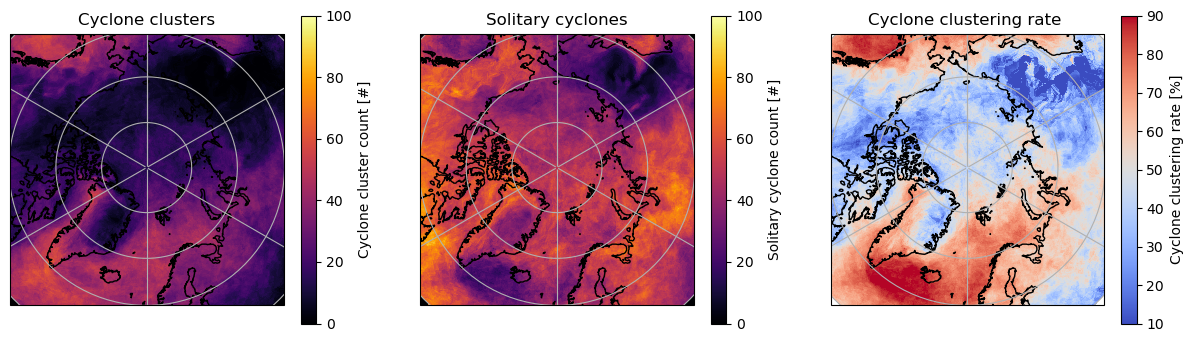

In [12]:
### Calculate total number of cyclone (cluster) occurrences  ###
N_clusters = data['CY_Clusters_1st'].astype('float').sum(dim='time')
N_solitary = data['CY_Objects_1st'].astype('float').sum(dim='time')

N_clustered_cyclones = data['CY_Clusters_size'].astype('float').sum(dim='time')
N_all_cyclones = N_solitary + N_clustered_cyclones

### Choose domain for plotting ###
domain = [0,359.9,60,90]  # lon_min, lon_max, lat_min, lat_max

### Choose appropriate minima and maxima for the colorscale ###
vmin = 0
vmax = 100

vmin_rate = 10
vmax_rate = 90

### Create a figure with 3 subplots: Absolute number of cyclone clusters, absolute number of solitary cyclones, clustering rate (number of clustered cyclones divided by number of all cyclones) ###
plt.figure(figsize=(15,4))

ax0 = plt.subplot(1, 3, 1, projection=ccrs.NorthPolarStereo())                            
ax0.gridlines()
ax0.coastlines(resolution='50m')
ax0.set_extent(domain,
              crs=ccrs.PlateCarree()
              )

ax0.set_title('Cyclone clusters')

h0 = ax0.pcolormesh(data.lon,data.lat,N_clusters,
              transform=ccrs.PlateCarree(),
              cmap='inferno',
              vmin=vmin,
              vmax=vmax
              )

plt.colorbar(h0,label='Cyclone cluster count [#]')

ax1 = plt.subplot(1, 3, 2, projection=ccrs.NorthPolarStereo())                            
ax1.gridlines()
ax1.coastlines(resolution='50m')
ax1.set_extent(domain,
              crs=ccrs.PlateCarree()
              )

ax1.set_title('Solitary cyclones')

h1 = ax1.pcolormesh(data.lon,data.lat,N_solitary,
              transform=ccrs.PlateCarree(),
              cmap='inferno',
              vmin=vmin,
              vmax=vmax
              )

plt.colorbar(h1,label='Solitary cyclone count [#]')

ax2 = plt.subplot(1, 3, 3, projection=ccrs.NorthPolarStereo())                            
ax2.gridlines()
ax2.coastlines(resolution='50m')
ax2.set_extent(domain,
              crs=ccrs.PlateCarree()
              )

ax2.set_title('Cyclone clustering rate ')

h2 = ax2.pcolormesh(data.lon,data.lat,100 * np.round(N_clustered_cyclones/N_all_cyclones,2),
              transform=ccrs.PlateCarree(),
              cmap='coolwarm',
              vmin=vmin_rate,
              vmax=vmax_rate
              )

plt.colorbar(h2,label='Cyclone clustering rate [%]')